<a href="https://colab.research.google.com/github/DenisseCardona/Tareas_EstadisticaAplicada_24/blob/main/EDCP_1888872_EAG51_actividad7_mar2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 7 

Estadística Aplicada GPO 51 

Erika Denisse Cardona Padilla 

Matrícula: 1888872


In [1]:
#Primero instalamos las librerías a utilizar en toda la actividad
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

**PROCESO DE MEDIA MOVIL**

Con los dos últimos dígitos de la matrícula (7 y 2) se simulará una media movil de orden dos, MA(2) donde 𝜃1 = 7 y 𝜃2 = 2

Entonces: 
$Y_t = \varepsilon_t + 0.7 \varepsilon_{t-1} + 0.2 \varepsilon_{t-2}$

In [3]:
np.random.seed(29)
ma2 = np.array([1, 0.7, 0.2])
ar2 = np.array([1])
proceso_ma2 = ArmaProcess(ar2, ma2).generate_sample(1000)

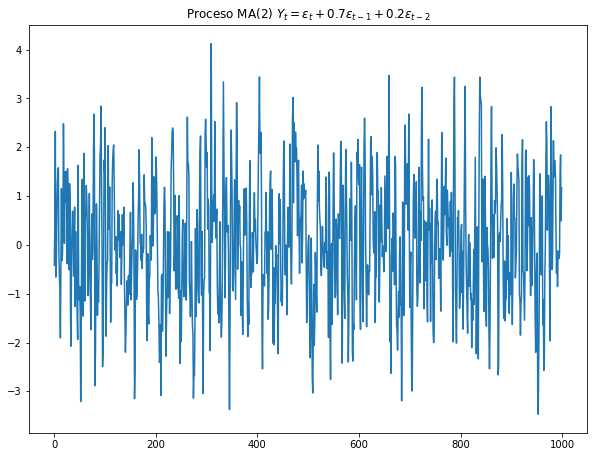

In [4]:
#graficamos
plt.plot(proceso_ma2)
plt.title(r'Proceso MA(2) $Y_t = \varepsilon_t + 0.7 \varepsilon_{t-1}+ 0.2 \varepsilon_{t-2}$')
plt.show()

In [5]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(proceso_ma2)

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.000000


NOTA: ***H0*** : serie no estacionaria

In [6]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


Teniendo que la serie es estacionaria porque se obtuvo un p valor de 0.000000 y este es menor a 0.05, se procede a hacer su autocorrelación y autocorrelación parcial.

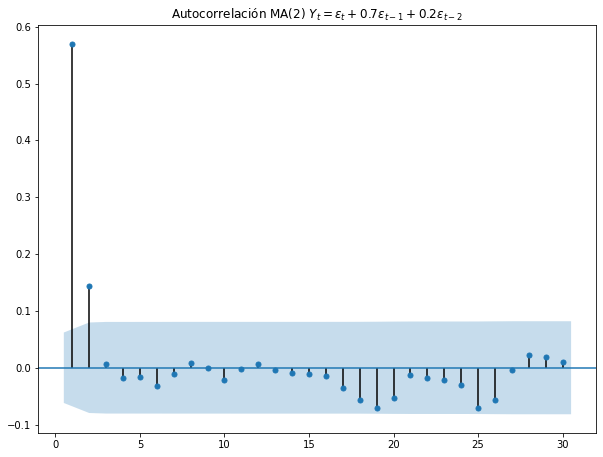

In [7]:
#graficamos función de autocorrelación
plot_acf(proceso_ma2, zero=False, lags=30)
plt.title(r'Autocorrelación MA(2) $Y_t = \varepsilon_t + 0.7 \varepsilon_{t-1}+ 0.2 \varepsilon_{t-2}$ ')
plt.show()

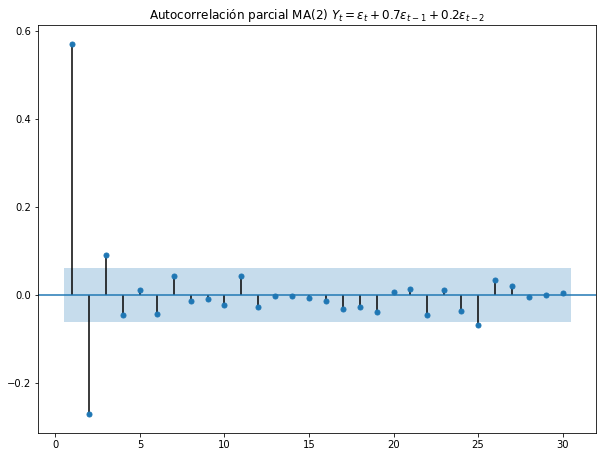

In [8]:
plot_pacf(proceso_ma2, zero=False, lags=30)
plt.title(r'Autocorrelación parcial MA(2) $Y_t = \varepsilon_t + 0.7 \varepsilon_{t-1}+ 0.2 \varepsilon_{t-2}$')
plt.show() 

**PROCESO AUTORREGRESIVO**

Se simulará un proceso autorregresivo de primer orden AR(1) (porque en la matrícula los números requeridos son iguales) donde 𝜑1 = 0.8

Entonces: $Y_t = \varepsilon_t + 0.8 Y_{t-1}$

In [10]:
#Lo modelamos como un proceso arma sin la parte AR(p)
np.random.seed(39)
ma1 = np.array([1])
ar1 = np.array([1, -0.8])
proceso_ar1 = ArmaProcess(ar1, ma1).generate_sample(1000)

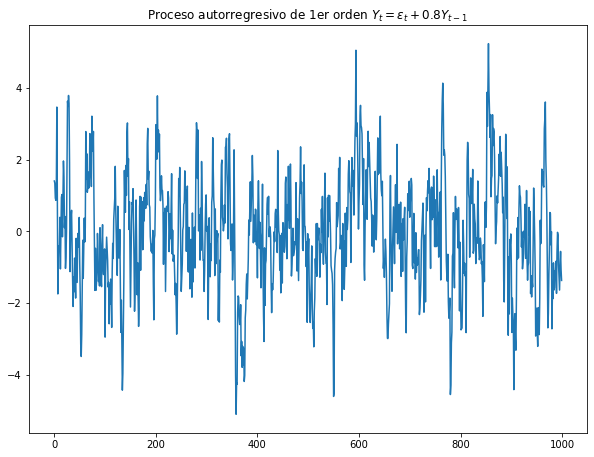

In [11]:
#graficamos
plt.plot(proceso_ar1)
plt.title(r'Proceso autorregresivo de 1er orden $Y_t = \varepsilon_t + 0.8 Y_{t-1}$')
plt.show()

Vemos si es estacionaria o no recordando: ***H0*** : serie no estacionaria

In [12]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(proceso_ar1)

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.000000


Teniendo que la serie es estacionaria porque se obtuvo un p valor de 0.000000 y este es menor a 0.05, se procede a hacer su autocorrelación y autocorrelación parcial.

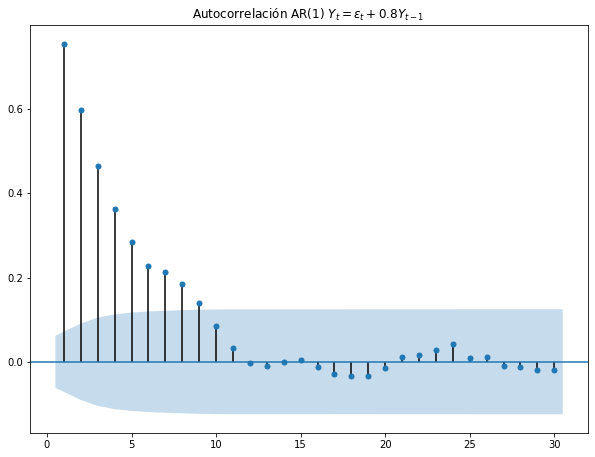

In [13]:
#graficamos función de autocorrelación
plot_acf(proceso_ar1, zero=False, lags=30)
plt.title(r'Autocorrelación AR(1) $Y_t = \varepsilon_t + 0.8 Y_{t-1}$ ')
plt.show()

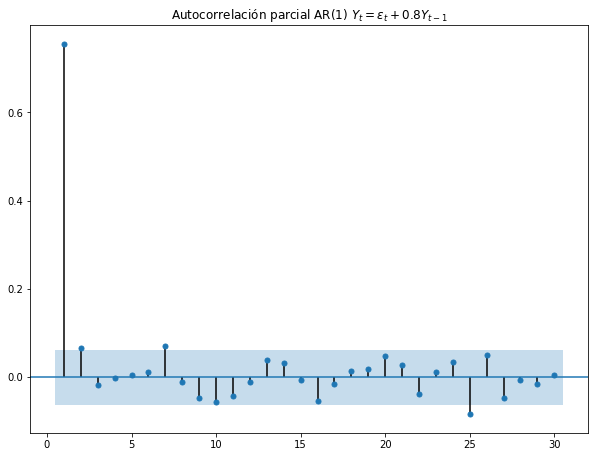

In [14]:
#graficamos función de autocorrelación parcial 
plot_pacf(proceso_ar1, zero=False, lags=30)
plt.title(r'Autocorrelación parcial AR(1) $Y_t = \varepsilon_t + 0.8 Y_{t-1}$')
plt.show()

**PROCESO ARMA**

Se simulará un proceso ARMA(1,2)

In [16]:
#en python tenemos que modelarlo como un proceso arma 
np.random.seed(39)
ma1 = np.array([1, 0.7, 0.2])
ar1 = np.array([1, -0.8])
proceso_ARMA = ArmaProcess(ar1, ma1).generate_sample(1000)

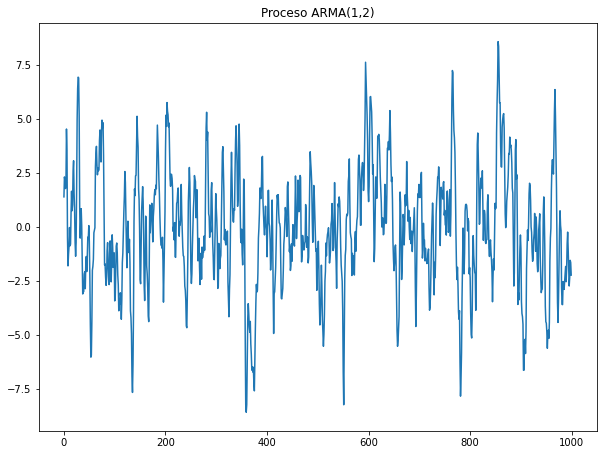

In [17]:
#graficamos
plt.plot(proceso_ARMA)
plt.title(r'Proceso ARMA(1,2)')
plt.show()

In [18]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(proceso_ARMA)

#presentamos el p-value
print('p-value: %f' % adf[1])

p-value: 0.000000


Teniendo que la serie es estacionaria porque se obtuvo un p valor de 0.000000 y este es menor a 0.05, se procede a hacer su autocorrelación y autocorrelación parcial.

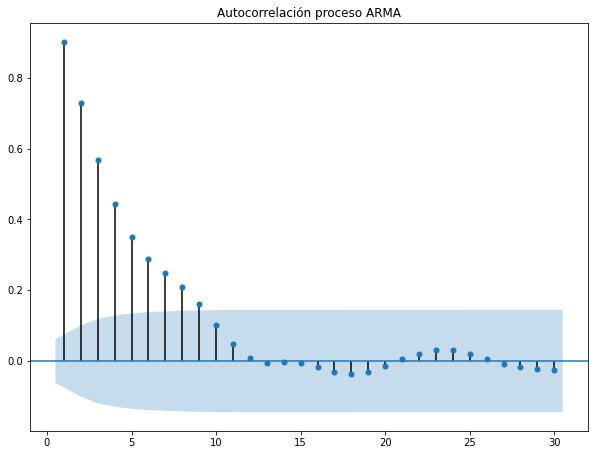

In [19]:
#graficamos función de autocorrelación
plot_acf(proceso_ARMA, zero=False, lags=30)
plt.title(r'Autocorrelación proceso ARMA')
plt.show()

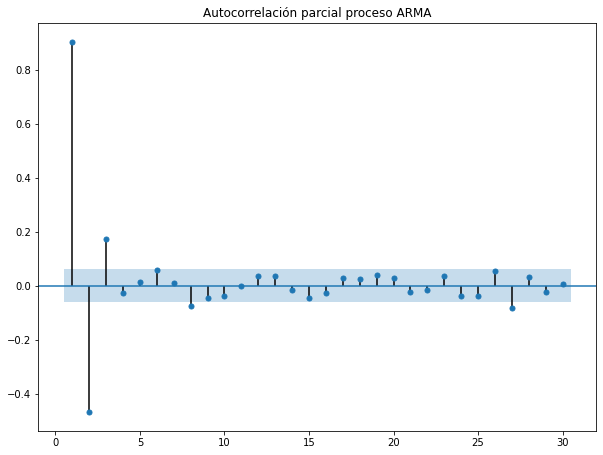

In [20]:
#graficamos función de autocorrelación parcial
plot_pacf(proceso_ARMA, zero=False, lags=30)
plt.title(r'Autocorrelación parcial proceso ARMA')
plt.show()